### Importing Libraries

In [1]:
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd

#datavisualizations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#requests_cache to cache API call data
import requests_cache 
import time
from IPython.core.display import clear_output
from tqdm import tqdm

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# keeping data from API calls into cache
requests_cache.install_cache()

### API Calls

While Loop over api.spacexdata (great API !) - over launch pages

Append list with API call results, to then make a DataFrame out of it
All calls cached locally with requests_cache : limit amount of calls needed and ease on the API server

In [12]:
page = 1
final_page = 100 #final page for while loop

responses_list = []

#loop over page with url launches/page
while page < final_page:
    print('The rocket is on the launch pad - API call ignition')
    print(f'SpaceX API call - requesting page {page}/{page}')
    
    # clear the output of each print to make things neater
    clear_output(wait = True)
    
    payload = {'limit':500,
    'page':page}
    url = f'https://api.spacexdata.com/v3/launches/{page}'
    
    response = requests.get(url)
    
    #back stop if error = stop looping
    if response.status_code != 200:
        print('limit page result reached on page number',page,response.text, '- end of API call')
        break
    
    #if it's not a cached result, sleep
    if not getattr(response, 'from_cache', False):
        time.sleep(0.35)
    
    #append response list
    responses_list.append(response)
    
    #increment page number
    page += 1
    
    print("Requested page {}/{}".format(page, page), 'SpaceX API call completed')

Requested page 100/100 SpaceX API call completed


###### testing API call on 1st launch

In [13]:
url = 'https://api.spacexdata.com/v3/launches/'

result = requests.get(f'https://api.spacexdata.com/v3/launches/1')

print(json.dumps(result.json(), indent=4))

{
    "flight_number": 1,
    "mission_name": "FalconSat",
    "mission_id": [],
    "upcoming": false,
    "launch_year": "2006",
    "launch_date_unix": 1143239400,
    "launch_date_utc": "2006-03-24T22:30:00.000Z",
    "launch_date_local": "2006-03-25T10:30:00+12:00",
    "is_tentative": false,
    "tentative_max_precision": "hour",
    "tbd": false,
    "launch_window": 0,
    "rocket": {
        "rocket_id": "falcon1",
        "rocket_name": "Falcon 1",
        "rocket_type": "Merlin A",
        "first_stage": {
            "cores": [
                {
                    "core_serial": "Merlin1A",
                    "flight": 1,
                    "block": null,
                    "gridfins": false,
                    "legs": false,
                    "reused": false,
                    "land_success": null,
                    "landing_intent": false,
                    "landing_type": null,
                    "landing_vehicle": null
                }
            ]
     

dict of dictionaries

In [14]:
#dummy df of JSON call & normalize JSON to picture final df result
r0 = responses_list[0]
r0_json = json_normalize(r0.json())
df1 = pd.DataFrame(r0_json)
df1.head()

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,tbd,launch_window,ships,launch_success,details,static_fire_date_utc,static_fire_date_unix,crew,rocket.rocket_id,rocket.rocket_name,rocket.rocket_type,rocket.first_stage.cores,rocket.second_stage.block,rocket.second_stage.payloads,rocket.fairings.reused,rocket.fairings.recovery_attempt,rocket.fairings.recovered,rocket.fairings.ship,telemetry.flight_club,launch_site.site_id,launch_site.site_name,launch_site.site_name_long,launch_failure_details.time,launch_failure_details.altitude,launch_failure_details.reason,links.mission_patch,links.mission_patch_small,links.reddit_campaign,links.reddit_launch,links.reddit_recovery,links.reddit_media,links.presskit,links.article_link,links.wikipedia,links.video_link,links.youtube_id,links.flickr_images,timeline.webcast_liftoff
0,1,FalconSat,[],False,2006,1143239400,2006-03-24T22:30:00.000Z,2006-03-25T10:30:00+12:00,False,hour,False,0,[],False,Engine failure at 33 seconds and loss of vehicle,2006-03-17T00:00:00.000Z,1142553600,None,falcon1,Falcon 1,Merlin A,"[{'core_serial': 'Merlin1A', 'flight': 1, 'blo...",1,"[{'payload_id': 'FalconSAT-2', 'norad_id': [],...",False,False,False,None,None,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,33,None,merlin engine failure,https://images2.imgbox.com/40/e3/GypSkayF_o.png,https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,None,None,None,None,None,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,[],54


In [15]:
df1.columns

Index(['flight_number', 'mission_name', 'mission_id', 'upcoming',
       'launch_year', 'launch_date_unix', 'launch_date_utc',
       'launch_date_local', 'is_tentative', 'tentative_max_precision', 'tbd',
       'launch_window', 'ships', 'launch_success', 'details',
       'static_fire_date_utc', 'static_fire_date_unix', 'crew',
       'rocket.rocket_id', 'rocket.rocket_name', 'rocket.rocket_type',
       'rocket.first_stage.cores', 'rocket.second_stage.block',
       'rocket.second_stage.payloads', 'rocket.fairings.reused',
       'rocket.fairings.recovery_attempt', 'rocket.fairings.recovered',
       'rocket.fairings.ship', 'telemetry.flight_club', 'launch_site.site_id',
       'launch_site.site_name', 'launch_site.site_name_long',
       'launch_failure_details.time', 'launch_failure_details.altitude',
       'launch_failure_details.reason', 'links.mission_patch',
       'links.mission_patch_small', 'links.reddit_campaign',
       'links.reddit_launch', 'links.reddit_recovery', 'lin

### Listing variables

**Important variables to keep**

- 'launch_year' : deprecated 
- 'launch_date_unix' : 
- 'launch_date_utc', :
- - 'crew', : 
- 'ships' : 
- 'launch_success' : True when success
- 'details', : 
- 'launch_site.site_id', : 
- 'launch_site.site_name' : 
- 'launch_site.site_name_long', : 
- 'launch_failure_details.time' : 
- 'launch_failure_details.altitude', : 
- 'launch_failure_details.reason' : 

**ID related**
- flight_number : 
- mission_name : 
- mission_id : 

**Launch related**
- launch_year : deprecated 
- launch_date_unix : 
- launch_date_utc :
- - crew : 
- ships : 
- launch_success : True when success
- details : 
- launch_site.site_id : 
- launch_site.site_name : 
- launch_site.site_name_long : 
- launch_failure_details.time : 
- launch_failure_details.altitude : 
- launch_failure_details.reason : 

**Rocket related**
- rocket.rocket_id : 
- rocket.rocket_name : 
- rocket.rocket_type :
- rocket.second_stage.payloads : 
- rocket.fairings.reused : 
- rocket.fairings.recovery_attempt : 
- rocket.fairings.recovered : 

**Useless**
- ditching all links columns = only article & PNG links
- upcoming' : Set as true until the moment of launch

### for loop to create final df with all calls from appended list

In [16]:
#empty list to append all API calls
frame = [] 
for i in range(len(responses_list)):
    r = responses_list[i]
    df_temp = pd.DataFrame(json_normalize(r.json()))
    frame.append(df_temp)
df_launch_raw = pd.concat(frame, sort=False)

In [71]:
r.json()

{'flight_number': 99,
 'mission_name': 'SXM-7',
 'mission_id': [],
 'launch_year': '2020',
 'launch_date_unix': 1596326400,
 'launch_date_utc': '2020-08-02T00:00:00.000Z',
 'launch_date_local': '2020-08-01T20:00:00-04:00',
 'is_tentative': True,
 'tentative_max_precision': 'day',
 'tbd': False,
 'launch_window': None,
 'rocket': {'rocket_id': 'falcon9',
  'rocket_name': 'Falcon 9',
  'rocket_type': 'FT',
  'first_stage': {'cores': [{'core_serial': None,
     'flight': None,
     'block': 5,
     'gridfins': None,
     'legs': None,
     'reused': None,
     'land_success': None,
     'landing_intent': None,
     'landing_type': None,
     'landing_vehicle': None}]},
  'second_stage': {'block': 5,
   'payloads': [{'payload_id': 'SXM-7',
     'norad_id': [],
     'reused': False,
     'customers': ['SiriusXM'],
     'nationality': 'United States',
     'manufacturer': 'SSL',
     'payload_type': 'Satellite',
     'payload_mass_kg': None,
     'payload_mass_lbs': None,
     'orbit': 'GTO'

In [17]:
print(len(responses_list))

type(responses_list[0])

99


requests.models.Response

In [18]:
df_launch_raw

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,tbd,launch_window,ships,launch_success,details,static_fire_date_utc,static_fire_date_unix,crew,rocket.rocket_id,rocket.rocket_name,rocket.rocket_type,rocket.first_stage.cores,rocket.second_stage.block,rocket.second_stage.payloads,rocket.fairings.reused,rocket.fairings.recovery_attempt,rocket.fairings.recovered,rocket.fairings.ship,telemetry.flight_club,launch_site.site_id,launch_site.site_name,launch_site.site_name_long,launch_failure_details.time,launch_failure_details.altitude,launch_failure_details.reason,links.mission_patch,links.mission_patch_small,links.reddit_campaign,links.reddit_launch,links.reddit_recovery,links.reddit_media,links.presskit,links.article_link,links.wikipedia,links.video_link,links.youtube_id,links.flickr_images,timeline.webcast_liftoff,rocket.fairings,timeline.go_for_prop_loading,timeline.rp1_loading,timeline.stage1_lox_loading,timeline.stage2_lox_loading,timeline.engine_chill,timeline.prelaunch_checks,timeline.propellant_pressurization,timeline.go_for_launch,timeline.ignition,timeline.liftoff,timeline.maxq,timeline.meco,timeline.stage_sep,timeline.second_stage_ignition,timeline.seco-1,timeline.dragon_separation,timeline.dragon_solar_deploy,timeline.dragon_bay_door_deploy,timeline.fairing_deploy,timeline.payload_deploy,timeline.second_stage_restart,timeline.seco-2,timeline.webcast_launch,timeline.payload_deploy_1,timeline.payload_deploy_2,timeline.first_stage_boostback_burn,timeline.first_stage_entry_burn,timeline.first_stage_landing,timeline,timeline.beco,timeline.side_core_sep,timeline.side_core_boostback,timeline.center_stage_sep,timeline.center_core_boostback,timeline.side_core_entry_burn,timeline.center_core_entry_burn,timeline.side_core_landing,timeline.center_core_landing,timeline.first_stage_landing_burn,timeline.stage1_rp1_loading,timeline.stage2_rp1_loading,timeline.seco-3,timeline.seco-4,last_date_update,last_ll_launch_date,last_ll_update,last_wiki_launch_date,last_wiki_revision,last_wiki_update,launch_date_source
0,1,FalconSat,[],False,2006,1143239400,2006-03-24T22:30:00.000Z,2006-03-25T10:30:00+12:00,False,hour,False,0,[],False,Engine failure at 33 seconds and loss of vehicle,2006-03-17T00:00:00.000Z,1142553600,None,falcon1,Falcon 1,Merlin A,"[{'core_serial': 'Merlin1A', 'flight': 1, 'blo...",1,"[{'payload_id': 'FalconSAT-2', 'norad_id': [],...",False,False,False,None,None,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,33.0,None,merlin engine failure,https://images2.imgbox.com/40/e3/GypSkayF_o.png,https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,None,None,None,None,None,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,[],54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,DemoSat,[],False,2007,1174439400,2007-03-21T01:10:00.000Z,2007-03-21T13:10:00+12:00,False,hour,False,0,[],False,Successful first stage burn and transition to ...,None,None,None,falcon1,Falcon 1,Merlin A,"[{'core_serial': 'Merlin2A', 'flight': 1, 'blo...",1,"[{'payload_id': 'DemoSAT', 'norad_id': [], 're...",False,False,False,None,None,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,301.0,289,harmonic oscillation leading to premature engi...,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,None,None,None,None,None,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,[],60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [19]:
df_launch_raw.to_csv('launch_raw.csv', index=False)

### Series of columns to keep

In [20]:
## dropping links columns

In [21]:
df_launch_raw

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,tbd,launch_window,ships,launch_success,details,static_fire_date_utc,static_fire_date_unix,crew,rocket.rocket_id,rocket.rocket_name,rocket.rocket_type,rocket.first_stage.cores,rocket.second_stage.block,rocket.second_stage.payloads,rocket.fairings.reused,rocket.fairings.recovery_attempt,rocket.fairings.recovered,rocket.fairings.ship,telemetry.flight_club,launch_site.site_id,launch_site.site_name,launch_site.site_name_long,launch_failure_details.time,launch_failure_details.altitude,launch_failure_details.reason,links.mission_patch,links.mission_patch_small,links.reddit_campaign,links.reddit_launch,links.reddit_recovery,links.reddit_media,links.presskit,links.article_link,links.wikipedia,links.video_link,links.youtube_id,links.flickr_images,timeline.webcast_liftoff,rocket.fairings,timeline.go_for_prop_loading,timeline.rp1_loading,timeline.stage1_lox_loading,timeline.stage2_lox_loading,timeline.engine_chill,timeline.prelaunch_checks,timeline.propellant_pressurization,timeline.go_for_launch,timeline.ignition,timeline.liftoff,timeline.maxq,timeline.meco,timeline.stage_sep,timeline.second_stage_ignition,timeline.seco-1,timeline.dragon_separation,timeline.dragon_solar_deploy,timeline.dragon_bay_door_deploy,timeline.fairing_deploy,timeline.payload_deploy,timeline.second_stage_restart,timeline.seco-2,timeline.webcast_launch,timeline.payload_deploy_1,timeline.payload_deploy_2,timeline.first_stage_boostback_burn,timeline.first_stage_entry_burn,timeline.first_stage_landing,timeline,timeline.beco,timeline.side_core_sep,timeline.side_core_boostback,timeline.center_stage_sep,timeline.center_core_boostback,timeline.side_core_entry_burn,timeline.center_core_entry_burn,timeline.side_core_landing,timeline.center_core_landing,timeline.first_stage_landing_burn,timeline.stage1_rp1_loading,timeline.stage2_rp1_loading,timeline.seco-3,timeline.seco-4,last_date_update,last_ll_launch_date,last_ll_update,last_wiki_launch_date,last_wiki_revision,last_wiki_update,launch_date_source
0,1,FalconSat,[],False,2006,1143239400,2006-03-24T22:30:00.000Z,2006-03-25T10:30:00+12:00,False,hour,False,0,[],False,Engine failure at 33 seconds and loss of vehicle,2006-03-17T00:00:00.000Z,1142553600,None,falcon1,Falcon 1,Merlin A,"[{'core_serial': 'Merlin1A', 'flight': 1, 'blo...",1,"[{'payload_id': 'FalconSAT-2', 'norad_id': [],...",False,False,False,None,None,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,33.0,None,merlin engine failure,https://images2.imgbox.com/40/e3/GypSkayF_o.png,https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,None,None,None,None,None,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,[],54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,DemoSat,[],False,2007,1174439400,2007-03-21T01:10:00.000Z,2007-03-21T13:10:00+12:00,False,hour,False,0,[],False,Successful first stage burn and transition to ...,None,None,None,falcon1,Falcon 1,Merlin A,"[{'core_serial': 'Merlin2A', 'flight': 1, 'blo...",1,"[{'payload_id': 'DemoSAT', 'norad_id': [], 're...",False,False,False,None,None,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,301.0,289,harmonic oscillation leading to premature engi...,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,None,None,None,None,None,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,[],60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [22]:
links = ['links.mission_patch',
       'links.mission_patch_small', 'links.reddit_campaign',
       'links.reddit_launch', 'links.reddit_recovery', 'links.reddit_media',
       'links.presskit', 'links.article_link', 'links.wikipedia',
       'links.video_link', 'links.youtube_id', 'links.flickr_images']

In [23]:
df_launch_raw.drop(columns=links, inplace=True)
df_launch_raw

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,tbd,launch_window,ships,launch_success,details,static_fire_date_utc,static_fire_date_unix,crew,rocket.rocket_id,rocket.rocket_name,rocket.rocket_type,rocket.first_stage.cores,rocket.second_stage.block,rocket.second_stage.payloads,rocket.fairings.reused,rocket.fairings.recovery_attempt,rocket.fairings.recovered,rocket.fairings.ship,telemetry.flight_club,launch_site.site_id,launch_site.site_name,launch_site.site_name_long,launch_failure_details.time,launch_failure_details.altitude,launch_failure_details.reason,timeline.webcast_liftoff,rocket.fairings,timeline.go_for_prop_loading,timeline.rp1_loading,timeline.stage1_lox_loading,timeline.stage2_lox_loading,timeline.engine_chill,timeline.prelaunch_checks,timeline.propellant_pressurization,timeline.go_for_launch,timeline.ignition,timeline.liftoff,timeline.maxq,timeline.meco,timeline.stage_sep,timeline.second_stage_ignition,timeline.seco-1,timeline.dragon_separation,timeline.dragon_solar_deploy,timeline.dragon_bay_door_deploy,timeline.fairing_deploy,timeline.payload_deploy,timeline.second_stage_restart,timeline.seco-2,timeline.webcast_launch,timeline.payload_deploy_1,timeline.payload_deploy_2,timeline.first_stage_boostback_burn,timeline.first_stage_entry_burn,timeline.first_stage_landing,timeline,timeline.beco,timeline.side_core_sep,timeline.side_core_boostback,timeline.center_stage_sep,timeline.center_core_boostback,timeline.side_core_entry_burn,timeline.center_core_entry_burn,timeline.side_core_landing,timeline.center_core_landing,timeline.first_stage_landing_burn,timeline.stage1_rp1_loading,timeline.stage2_rp1_loading,timeline.seco-3,timeline.seco-4,last_date_update,last_ll_launch_date,last_ll_update,last_wiki_launch_date,last_wiki_revision,last_wiki_update,launch_date_source
0,1,FalconSat,[],False,2006,1143239400,2006-03-24T22:30:00.000Z,2006-03-25T10:30:00+12:00,False,hour,False,0,[],False,Engine failure at 33 seconds and loss of vehicle,2006-03-17T00:00:00.000Z,1142553600,None,falcon1,Falcon 1,Merlin A,"[{'core_serial': 'Merlin1A', 'flight': 1, 'blo...",1,"[{'payload_id': 'FalconSAT-2', 'norad_id': [],...",False,False,False,None,None,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,33.0,None,merlin engine failure,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,DemoSat,[],False,2007,1174439400,2007-03-21T01:10:00.000Z,2007-03-21T13:10:00+12:00,False,hour,False,0,[],False,Successful first stage burn and transition to ...,None,None,None,falcon1,Falcon 1,Merlin A,"[{'core_serial': 'Merlin2A', 'flight': 1, 'blo...",1,"[{'payload_id': 'DemoSAT', 'norad_id': [], 're...",False,False,False,None,None,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,301.0,289,harmonic oscillation leading to premature engi...,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3,Trailblazer,[],False,2008,1217648040,2008-08-02T03:34:00.000Z,2008-08-02T15:34:00+12:00,False,hour,False,0,[],False,Residual stage 1 thrust led to collision betwe...,None,None,None,falcon1,Falcon 1,Merlin C,"[{'core_serial': 'Merlin1C', 'flight': 1, 'blo...",1,"[{'payload_id': 'Trailblazer', 'norad_id': [],...",False,False,False,None,None,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,140.0,35,residual stage-1 thrust led to collision betwe...,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,RatSat,[],False,2008,1222643700,2008-09-28T23:15:00.000Z,2008-09-28T11:15:00+12:00,F

In [24]:
Rocket_related = pd.Series(
['rocket_id',
'rocket_name',
'rocket_type',
'second_stage.payloads',
'fairings.reused',
'fairings.recovery_attempt',
'fairings.recovered'])

In [25]:
rocket = pd.DataFrame(Rocket_related)
rocket

,0
0,rocket_id
1,rocket_name
2,rocket_type
3,second_stage.payloads
4,fairings.reused
5,fairings.recovery_attempt
6,fairings.recovered


In [26]:
percent_missing = df_launch_raw.isnull().sum() / len(df_launch_raw) * 100

percent_missing.tail(10)

timeline.stage2_rp1_loading    97.979798
timeline.seco-3                98.989899
timeline.seco-4                98.989899
last_date_update               85.858586
last_ll_launch_date            87.878788
last_ll_update                 87.878788
last_wiki_launch_date          85.858586
last_wiki_revision             85.858586
last_wiki_update               85.858586
launch_date_source             85.858586
dtype: float64

In [27]:
missing_value = pd.DataFrame({'column_name': df_launch_raw.columns,
                             'percent_missing':percent_missing})

#filtering to display only columns with 0% missing data = 100% complete columns
missing_value.sort_values(by='percent_missing').head(50)

,column_name,percent_missing
flight_number,flight_number,0.000000
rocket.second_stage.payloads,rocket.second_stage.payloads,0.000000
rocket.first_stage.cores,rocket.first_stage.cores,0.000000
rocket.rocket_type,rocket.rocket_type,0.000000
rocket.rocket_name,rocket.rocket_name,0.000000
rocket.rocket_id,rocket.rocket_id,0.000000
launch_site.site_name_long,launch_site.site_name_long,0.000000
launch_site.site_name,launch_site.site_name,0.000000
tbd,tbd,0.000000
ships,ships,0.000000


In [28]:
kept_columns = missing_value.sort_values(by='percent_missing').head(50).index

kept_columns

Index(['flight_number', 'rocket.second_stage.payloads',
       'rocket.first_stage.cores', 'rocket.rocket_type', 'rocket.rocket_name',
       'rocket.rocket_id', 'launch_site.site_name_long',
       'launch_site.site_name', 'tbd', 'ships', 'is_tentative',
       'launch_date_local', 'launch_date_utc', 'launch_date_unix',
       'launch_year', 'upcoming', 'mission_id', 'mission_name',
       'tentative_max_precision', 'launch_site.site_id',
       'rocket.second_stage.block', 'launch_success', 'static_fire_date_utc',
       'static_fire_date_unix', 'launch_window', 'details',
       'timeline.webcast_liftoff', 'timeline.prelaunch_checks',
       'timeline.engine_chill', 'timeline.ignition', 'timeline.liftoff',
       'timeline.go_for_prop_loading', 'timeline.stage2_lox_loading',
       'timeline.stage1_lox_loading', 'timeline.go_for_launch',
       'timeline.second_stage_ignition', 'timeline.propellant_pressurization',
       'timeline.rp1_loading', 'timeline.seco-1', 'timeline.stage_se

In [29]:
#ditching columns with over 50% null values

In [30]:
ditch_columns = missing_value[missing_value['percent_missing'] > 50]

ditch_columns

,column_name,percent_missing
crew,crew,100.000000
rocket.fairings.ship,rocket.fairings.ship,83.838384
telemetry.flight_club,telemetry.flight_club,54.545455
launch_failure_details.time,launch_failure_details.time,94.949495
launch_failure_details.altitude,launch_failure_details.altitude,95.959596
launch_failure_details.reason,launch_failure_details.reason,94.949495
rocket.fairings,rocket.fairings,100.000000
timeline.dragon_separation,timeline.dragon_separation,79.797980
timeline.dragon_solar_deploy,timeline.dragon_solar_deploy,81.818182
timeline.dragon_bay_door_deploy,timeline.dragon_bay_door_deploy,81.818182


In [31]:
df_launch_fs = df_launch_raw.drop(columns=ditch_columns.index)

df_launch_fs

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,tbd,launch_window,ships,launch_success,details,static_fire_date_utc,static_fire_date_unix,rocket.rocket_id,rocket.rocket_name,rocket.rocket_type,rocket.first_stage.cores,rocket.second_stage.block,rocket.second_stage.payloads,rocket.fairings.reused,rocket.fairings.recovery_attempt,rocket.fairings.recovered,launch_site.site_id,launch_site.site_name,launch_site.site_name_long,timeline.webcast_liftoff,timeline.go_for_prop_loading,timeline.rp1_loading,timeline.stage1_lox_loading,timeline.stage2_lox_loading,timeline.engine_chill,timeline.prelaunch_checks,timeline.propellant_pressurization,timeline.go_for_launch,timeline.ignition,timeline.liftoff,timeline.maxq,timeline.meco,timeline.stage_sep,timeline.second_stage_ignition,timeline.seco-1,timeline.fairing_deploy
0,1,FalconSat,[],False,2006,1143239400,2006-03-24T22:30:00.000Z,2006-03-25T10:30:00+12:00,False,hour,False,0,[],False,Engine failure at 33 seconds and loss of vehicle,2006-03-17T00:00:00.000Z,1142553600,falcon1,Falcon 1,Merlin A,"[{'core_serial': 'Merlin1A', 'flight': 1, 'blo...",1,"[{'payload_id': 'FalconSAT-2', 'norad_id': [],...",False,False,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,DemoSat,[],False,2007,1174439400,2007-03-21T01:10:00.000Z,2007-03-21T13:10:00+12:00,False,hour,False,0,[],False,Successful first stage burn and transition to ...,None,None,falcon1,Falcon 1,Merlin A,"[{'core_serial': 'Merlin2A', 'flight': 1, 'blo...",1,"[{'payload_id': 'DemoSAT', 'norad_id': [], 're...",False,False,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3,Trailblazer,[],False,2008,1217648040,2008-08-02T03:34:00.000Z,2008-08-02T15:34:00+12:00,False,hour,False,0,[],False,Residual stage 1 thrust led to collision betwe...,None,None,falcon1,Falcon 1,Merlin C,"[{'core_serial': 'Merlin1C', 'flight': 1, 'blo...",1,"[{'payload_id': 'Trailblazer', 'norad_id': [],...",False,False,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,RatSat,[],False,2008,1222643700,2008-09-28T23:15:00.000Z,2008-09-28T11:15:00+12:00,False,hour,False,0,[],True,Ratsat was carried to orbit on the first succe...,2008-09-20T00:00:00.000Z,1221868800,falcon1,Falcon 1,Merlin C,"[{'core_serial': 'Merlin2C', 'flight': 1, 'blo...",1,"[{'payload_id': 'RatSat', 'norad_id': [33393],...",False,False,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5,RazakSat,[],False,2009,1247456100,2009-07-13T03:35:00.000Z,2009-07-13T15:35:00+12:00,False,hour,False,0,[],True,None,None,None,falcon1,Falcon 1,Merlin C,"[{'core_serial': 'Merlin3C', 'flight': 1, 'blo...",1,"[{'payload_id': 'RazakSAT', 'norad_id': [35578...",False,False,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,95,Starlink 7,[],True,2020,1591056000,2020-06-02T00:00:00.000Z,2020-06-01T20:00:00-04:00,True,day,False,None,[],None,None,2020-05-13T11:11:00.000Z,1589368260,falcon9,Falcon 9,FT,"[{'core_serial': 'B1049', 'flight': 4, 'block'...",5,"[{'payload_id': 'Starlink 7', 'norad_id': [], ...",None,None,None,ccafs_slc_40,CCAFS SLC 40,Cape Canaveral Air Force Station Space Launch ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,96,Starlink-8 & SkySat 16-18,[],True,2020,1590969600,2020-06-01T00:00:00.000Z,2020-05-31T20:00:00-04:00,True,month,False,None,[],None,None,None,None,falcon9,Falcon 9,FT

In [32]:
df_launch_fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 0
Data columns (total 46 columns):
flight_number                         99 non-null int64
mission_name                          99 non-null object
mission_id                            99 non-null object
upcoming                              99 non-null bool
launch_year                           99 non-null object
launch_date_unix                      99 non-null int64
launch_date_utc                       99 non-null object
launch_date_local                     99 non-null object
is_tentative                          99 non-null bool
tentative_max_precision               99 non-null object
tbd                                   99 non-null bool
launch_window                         90 non-null object
ships                                 99 non-null object
launch_success                        93 non-null object
details                               87 non-null object
static_fire_date_utc                  92 non-null o

In [33]:
# data conversion
df_launch_fs['launch_success'] = df_launch_fs['launch_success'].astype(bool)
df_launch_fs['launch_date_utc'] = pd.to_datetime(df_launch_fs['launch_date_utc'])

In [34]:
df_launch_fs['launch_date_utc']

0   2006-03-24 22:30:00+00:00
0   2007-03-21 01:10:00+00:00
0   2008-08-02 03:34:00+00:00
0   2008-09-28 23:15:00+00:00
0   2009-07-13 03:35:00+00:00
               ...           
0   2020-06-02 00:00:00+00:00
0   2020-06-01 00:00:00+00:00
0   2020-06-01 00:00:00+00:00
0   2020-06-30 00:00:00+00:00
0   2020-08-02 00:00:00+00:00
Name: launch_date_utc, Length: 99, dtype: datetime64[ns, UTC]

In [35]:
data['SARS-Cov-2 exam result'].value_counts(normalize=True).plot(kind='bar', figsize=(13,7), color=['r','b'])
plt.title('mart')

NameError: name 'data' is not defined

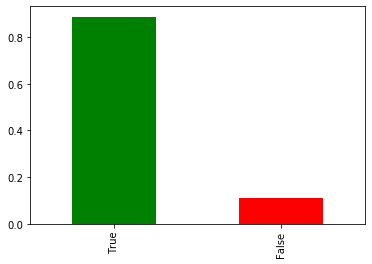

In [36]:
df_launch_fs['launch_success'].value_counts(normalize=True).plot(kind='bar', color=['g','r'])

In [37]:
df_launch_fs['launch_date_utc']

0   2006-03-24 22:30:00+00:00
0   2007-03-21 01:10:00+00:00
0   2008-08-02 03:34:00+00:00
0   2008-09-28 23:15:00+00:00
0   2009-07-13 03:35:00+00:00
               ...           
0   2020-06-02 00:00:00+00:00
0   2020-06-01 00:00:00+00:00
0   2020-06-01 00:00:00+00:00
0   2020-06-30 00:00:00+00:00
0   2020-08-02 00:00:00+00:00
Name: launch_date_utc, Length: 99, dtype: datetime64[ns, UTC]

In [38]:
df_launch_fs['launch_date_utc']

0   2006-03-24 22:30:00+00:00
0   2007-03-21 01:10:00+00:00
0   2008-08-02 03:34:00+00:00
0   2008-09-28 23:15:00+00:00
0   2009-07-13 03:35:00+00:00
               ...           
0   2020-06-02 00:00:00+00:00
0   2020-06-01 00:00:00+00:00
0   2020-06-01 00:00:00+00:00
0   2020-06-30 00:00:00+00:00
0   2020-08-02 00:00:00+00:00
Name: launch_date_utc, Length: 99, dtype: datetime64[ns, UTC]

In [39]:
sns.distplot(df_negative['Patient age quantile'], bins=30)

NameError: name 'df_negative' is not defined

In [40]:
df_launch_group = df_launch_fs.groupby('launch_date_utc').agg('count')

df_launch_group

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_local,is_tentative,tentative_max_precision,tbd,launch_window,ships,launch_success,details,static_fire_date_utc,static_fire_date_unix,rocket.rocket_id,rocket.rocket_name,rocket.rocket_type,rocket.first_stage.cores,rocket.second_stage.block,rocket.second_stage.payloads,rocket.fairings.reused,rocket.fairings.recovery_attempt,rocket.fairings.recovered,launch_site.site_id,launch_site.site_name,launch_site.site_name_long,timeline.webcast_liftoff,timeline.go_for_prop_loading,timeline.rp1_loading,timeline.stage1_lox_loading,timeline.stage2_lox_loading,timeline.engine_chill,timeline.prelaunch_checks,timeline.propellant_pressurization,timeline.go_for_launch,timeline.ignition,timeline.liftoff,timeline.maxq,timeline.meco,timeline.stage_sep,timeline.second_stage_ignition,timeline.seco-1,timeline.fairing_deploy
launch_date_utc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-03-24 22:30:00+00:00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007-03-21 01:10:00+00:00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-08-02 03:34:00+00:00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-09-28 23:15:00+00:00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009-07-13 03:35:00+00:00,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-30 19:22:00+00:00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-06-01 00:00:00+00:00,2,2,2,2,2,2,2,2,2,2,0,2,2,0,0,0,2,2,2,2,2,2,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-06-02 00:00:00+00:00,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


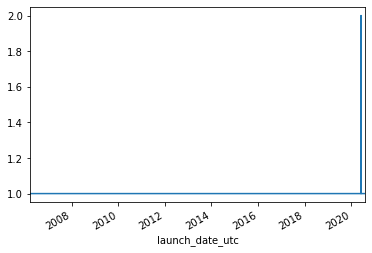

In [41]:
df_launch_group['flight_number'].plot()

C:\Users\langl\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])
C:\Users\langl\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


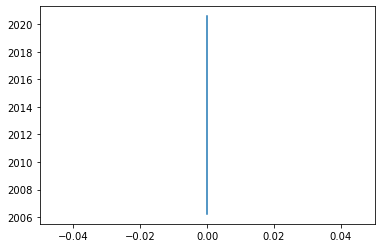

In [42]:
df_launch_fs['launch_date_utc'].plot()

In [43]:
for column in df_launch_fs.select_dtypes('object'):
    print(f'{column:-<70} {df_launch_fs[column].unique()}')

mission_name---------------------------------------------------------- ['FalconSat' 'DemoSat' 'Trailblazer' 'RatSat' 'RazakSat'
 'Falcon 9 Test Flight' 'COTS 1' 'COTS 2' 'CRS-1' 'CRS-2' 'CASSIOPE'
 'SES-8' 'Thaicom 6' 'CRS-3' 'OG-2 Mission 1' 'AsiaSat 8' 'AsiaSat 6'
 'CRS-4' 'CRS-5' 'DSCOVR' 'ABS-3A / Eutelsat 115W B' 'CRS-6'
 'TürkmenÄlem 52°E / MonacoSAT' 'CRS-7' 'OG-2 Mission 2' 'Jason 3' 'SES-9'
 'CRS-8' 'JCSAT-2B' 'Thaicom 8' 'ABS-2A / Eutelsat 117W B' 'CRS-9'
 'JCSAT-16' 'Amos-6' 'Iridium NEXT Mission 1' 'CRS-10' 'EchoStar 23'
 'SES-10' 'NROL-76' 'Inmarsat-5 F4' 'CRS-11' 'BulgariaSat-1'
 'Iridium NEXT Mission 2' 'Intelsat 35e' 'CRS-12' 'FormoSat-5'
 'Boeing X-37B OTV-5' 'Iridium NEXT Mission 3' 'SES-11 / Echostar 105'
 'KoreaSat 5A' 'CRS-13' 'Iridium NEXT Mission 4' 'ZUMA'
 'SES-16 / GovSat-1' 'Falcon Heavy Test Flight' 'Paz / Starlink Demo'
 'Hispasat 30W-6' 'Iridium NEXT Mission 5' 'CRS-14' 'TESS' 'Bangabandhu-1'
 'Iridium NEXT Mission 6' 'SES-12' 'CRS-15' 'Telstar 19V'
 'Iridi

TypeError: unhashable type: 'list'

In [44]:
Launch_related = pd.Series(
['launch_year', 
'launch_date_unix', 
'launch_date_utc',
'crew', 
'ships', 
'launch_success',
'details', 
'launch_site.site_id', 
'launch_site.site_name', 
'launch_site.site_name_long', 
'launch_failure_details.time', 
'launch_failure_details.altitude', 
'launch_failure_details.reason'])

launch = pd.DataFrame(Launch_related)
launch

,0
0,launch_year
1,launch_date_unix
2,launch_date_utc
3,crew
4,ships
5,launch_success
6,details
7,launch_site.site_id
8,launch_site.site_name
9,launch_site.site_name_long


In [45]:
df_launch_fs['rocket.second_stage.payloads'][0][0][0][0]

0    [{'payload_id': 'FalconSAT-2', 'norad_id': [],...
0    [{'payload_id': 'DemoSAT', 'norad_id': [], 're...
0    [{'payload_id': 'Trailblazer', 'norad_id': [],...
0    [{'payload_id': 'RatSat', 'norad_id': [33393],...
0    [{'payload_id': 'RazakSAT', 'norad_id': [35578...
                           ...                        
0    [{'payload_id': 'Starlink 7', 'norad_id': [], ...
0    [{'payload_id': 'Starlink 8', 'norad_id': [], ...
0    [{'payload_id': 'Starlink 9', 'norad_id': [], ...
0    [{'payload_id': 'GPS III SV03 (Columbus)', 'no...
0    [{'payload_id': 'SXM-7', 'norad_id': [], 'reus...
Name: rocket.second_stage.payloads, Length: 99, dtype: object

ValueError: setting an array element with a sequence.

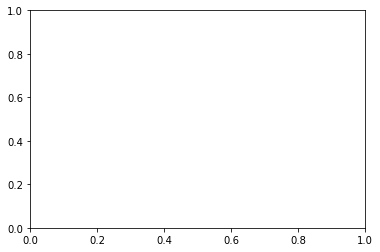

In [46]:
sns.distplot(df_launch_fs['rocket.second_stage.payloads'])

### Flatenning data from API call

In [47]:
df_launch_raw['rocket.first_stage.cores']

0    [{'core_serial': 'Merlin1A', 'flight': 1, 'blo...
0    [{'core_serial': 'Merlin2A', 'flight': 1, 'blo...
0    [{'core_serial': 'Merlin1C', 'flight': 1, 'blo...
0    [{'core_serial': 'Merlin2C', 'flight': 1, 'blo...
0    [{'core_serial': 'Merlin3C', 'flight': 1, 'blo...
                           ...                        
0    [{'core_serial': 'B1049', 'flight': 4, 'block'...
0    [{'core_serial': None, 'flight': None, 'block'...
0    [{'core_serial': None, 'flight': None, 'block'...
0    [{'core_serial': None, 'flight': None, 'block'...
0    [{'core_serial': None, 'flight': None, 'block'...
Name: rocket.first_stage.cores, Length: 99, dtype: object

In [48]:
df_flat_first = json_normalize(df_launch_raw['rocket.first_stage.cores'])
df_flat_first

AttributeError: 'list' object has no attribute 'values'

Nested dictionaries & nested lists among columns for 1st stage & 2nd stage of the rocket

- Series 'rocket' encompass key data : first stage & second stage payload data
looping with list to merge data to main df

In [49]:
def flatten(data, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(data[column]))
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        data = pd.concat([data, flattened], axis=1)
        data = data.drop(column, axis=1)
    return data

In [50]:
df_launch_raw['rocket.first_stage.cores']

0    [{'core_serial': 'Merlin1A', 'flight': 1, 'blo...
0    [{'core_serial': 'Merlin2A', 'flight': 1, 'blo...
0    [{'core_serial': 'Merlin1C', 'flight': 1, 'blo...
0    [{'core_serial': 'Merlin2C', 'flight': 1, 'blo...
0    [{'core_serial': 'Merlin3C', 'flight': 1, 'blo...
                           ...                        
0    [{'core_serial': 'B1049', 'flight': 4, 'block'...
0    [{'core_serial': None, 'flight': None, 'block'...
0    [{'core_serial': None, 'flight': None, 'block'...
0    [{'core_serial': None, 'flight': None, 'block'...
0    [{'core_serial': None, 'flight': None, 'block'...
Name: rocket.first_stage.cores, Length: 99, dtype: object

In [51]:
flat = flatten(df_launch_raw, nested_columns)
flat.head(10)

NameError: name 'nested_columns' is not defined

In [52]:
flat['rocket.first_stage.cores_0']

KeyError: 'rocket.first_stage.cores_0'

In [53]:
# df_launch_raw['rocket.first_stage.cores']

In [54]:
test_2= flattened_list(flat['rocket.first_stage.cores_0'])
test_2

NameError: name 'flattened_list' is not defined

In [55]:
# flatten = lambda l: [item for sublist in l for item in sublist]

In [56]:
def nested_list_extractor(append_list, dataframe):
    for sublist in dataframe:
        for item in sublist:
            append_list.append(item)
    return append_list

In [57]:
flattened_list = lambda l: [item for sublist in l for item in sublist]

In [58]:
first_stage_data = flattened_list(df_launch_raw['rocket.first_stage.cores'])
first_stage_data

[{'core_serial': 'Merlin1A',
  'flight': 1,
  'block': None,
  'gridfins': False,
  'legs': False,
  'reused': False,
  'land_success': None,
  'landing_intent': False,
  'landing_type': None,
  'landing_vehicle': None},
 {'core_serial': 'Merlin2A',
  'flight': 1,
  'block': None,
  'gridfins': False,
  'legs': False,
  'reused': False,
  'land_success': None,
  'landing_intent': False,
  'landing_type': None,
  'landing_vehicle': None},
 {'core_serial': 'Merlin1C',
  'flight': 1,
  'block': None,
  'gridfins': False,
  'legs': False,
  'reused': False,
  'land_success': None,
  'landing_intent': False,
  'landing_type': None,
  'landing_vehicle': None},
 {'core_serial': 'Merlin2C',
  'flight': 1,
  'block': None,
  'gridfins': False,
  'legs': False,
  'reused': False,
  'land_success': None,
  'landing_intent': False,
  'landing_type': None,
  'landing_vehicle': None},
 {'core_serial': 'Merlin3C',
  'flight': 1,
  'block': None,
  'gridfins': False,
  'legs': False,
  'reused': False

In [59]:
second_stage_data = flattened_list(df_launch_raw['rocket.second_stage.payloads'])
second_stage_data

[{'payload_id': 'FalconSAT-2',
  'norad_id': [],
  'reused': False,
  'customers': ['DARPA'],
  'nationality': 'United States',
  'manufacturer': 'SSTL',
  'payload_type': 'Satellite',
  'payload_mass_kg': 20,
  'payload_mass_lbs': 43,
  'orbit': 'LEO',
  'orbit_params': {'reference_system': 'geocentric',
   'regime': 'low-earth',
   'longitude': None,
   'semi_major_axis_km': None,
   'eccentricity': None,
   'periapsis_km': 400,
   'apoapsis_km': 500,
   'inclination_deg': 39,
   'period_min': None,
   'lifespan_years': None,
   'epoch': None,
   'mean_motion': None,
   'raan': None,
   'arg_of_pericenter': None,
   'mean_anomaly': None}},
 {'payload_id': 'DemoSAT',
  'norad_id': [],
  'reused': False,
  'customers': ['DARPA'],
  'nationality': 'United States',
  'manufacturer': 'SpaceX',
  'payload_type': 'Satellite',
  'payload_mass_kg': None,
  'payload_mass_lbs': None,
  'orbit': 'LEO',
  'orbit_params': {'reference_system': 'geocentric',
   'regime': 'low-earth',
   'longitude':

In [60]:
df_first_stage_cores = json_normalize(first_stage_data)
df_first_stage_cores

,core_serial,flight,block,gridfins,legs,reused,land_success,landing_intent,landing_type,landing_vehicle
0,Merlin1A,1.0,NaN,False,False,False,None,False,None,None
1,Merlin2A,1.0,NaN,False,False,False,None,False,None,None
2,Merlin1C,1.0,NaN,False,False,False,None,False,None,None
3,Merlin2C,1.0,NaN,False,False,False,None,False,None,None
4,Merlin3C,1.0,NaN,False,False,False,None,False,None,None
...,...,...,...,...,...,...,...,...,...,...
100,B1049,4.0,5.0,True,True,True,None,True,ASDS,OCISLY
101,None,NaN,5.0,None,None,True,None,None,None,None
102,None,NaN,5.0,None,None,True,None,None,None,None
103,None,NaN,NaN,None,None,False,None,None,None,None


In [61]:
df_second_stage_data = json_normalize(second_stage_data)
df_second_stage_data
json_normalize(second_stage_data)

,payload_id,norad_id,reused,customers,nationality,manufacturer,payload_type,payload_mass_kg,payload_mass_lbs,orbit,orbit_params.reference_system,orbit_params.regime,orbit_params.longitude,orbit_params.semi_major_axis_km,orbit_params.eccentricity,orbit_params.periapsis_km,orbit_params.apoapsis_km,orbit_params.inclination_deg,orbit_params.period_min,orbit_params.lifespan_years,orbit_params.epoch,orbit_params.mean_motion,orbit_params.raan,orbit_params.arg_of_pericenter,orbit_params.mean_anomaly,cap_serial,mass_returned_kg,mass_returned_lbs,flight_time_sec,cargo_manifest,uid
0,FalconSAT-2,[],False,[DARPA],United States,SSTL,Satellite,20.0,43.00,LEO,geocentric,low-earth,NaN,NaN,NaN,400.000,500.000,39.0000,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DemoSAT,[],False,[DARPA],United States,SpaceX,Satellite,NaN,NaN,LEO,geocentric,low-earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Trailblazer,[],False,[NASA],United States,Space Dev,Satellite,NaN,NaN,LEO,geocentric,low-earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRESat,[],False,[ORS],United States,None,Satellite,NaN,NaN,LEO,geocentric,low-earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RatSat,[33393],False,[SpaceX],United States,SpaceX,Satellite,165.0,363.00,LEO,geocentric,low-earth,NaN,6992.251,0.001269,605.243,622.989,9.3467,96.98,NaN,2020-05-26T16:23:34.000Z,14.848316,290.3143,35.2748,324.829,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Starlink 7,[],False,[SpaceX],United States,SpaceX,Satellite,15400.0,33951.20,VLEO,geocentric,very-low-earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,Starlink 8,[],False,[SpaceX],United States,SpaceX,Satellite,15400.0,33951.20,VLEO,geocentric,very-low-earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,Starlink 9,[],False,[SpaceX],United States,SpaceX,Satellite,15400.0,33951.20,VLEO,geocentric,very-low-earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,GPS III SV03 (Columbus),[],False,[USAF],United States,Lockheed Martin,Satellite,3880.0,8553.94,MEO,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df_test = pd.merge(df_launch_fs, df_first_stage_cores, how='left', left_index=True, right_index=True)

In [63]:
df_test.head(10)

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,tbd,launch_window,ships,launch_success,details,static_fire_date_utc,static_fire_date_unix,rocket.rocket_id,rocket.rocket_name,rocket.rocket_type,rocket.first_stage.cores,rocket.second_stage.block,rocket.second_stage.payloads,rocket.fairings.reused,rocket.fairings.recovery_attempt,rocket.fairings.recovered,launch_site.site_id,launch_site.site_name,launch_site.site_name_long,timeline.webcast_liftoff,timeline.go_for_prop_loading,timeline.rp1_loading,timeline.stage1_lox_loading,timeline.stage2_lox_loading,timeline.engine_chill,timeline.prelaunch_checks,timeline.propellant_pressurization,timeline.go_for_launch,timeline.ignition,timeline.liftoff,timeline.maxq,timeline.meco,timeline.stage_sep,timeline.second_stage_ignition,timeline.seco-1,timeline.fairing_deploy,core_serial,flight,block,gridfins,legs,reused,land_success,landing_intent,landing_type,landing_vehicle
0,1,FalconSat,[],False,2006,1143239400,2006-03-24 22:30:00+00:00,2006-03-25T10:30:00+12:00,False,hour,False,0,[],False,Engine failure at 33 seconds and loss of vehicle,2006-03-17T00:00:00.000Z,1142553600,falcon1,Falcon 1,Merlin A,"[{'core_serial': 'Merlin1A', 'flight': 1, 'blo...",1,"[{'payload_id': 'FalconSAT-2', 'norad_id': [],...",False,False,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merlin1A,1.0,NaN,False,False,False,None,False,None,None
0,2,DemoSat,[],False,2007,1174439400,2007-03-21 01:10:00+00:00,2007-03-21T13:10:00+12:00,False,hour,False,0,[],False,Successful first stage burn and transition to ...,None,None,falcon1,Falcon 1,Merlin A,"[{'core_serial': 'Merlin2A', 'flight': 1, 'blo...",1,"[{'payload_id': 'DemoSAT', 'norad_id': [], 're...",False,False,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merlin1A,1.0,NaN,False,False,False,None,False,None,None
0,3,Trailblazer,[],False,2008,1217648040,2008-08-02 03:34:00+00:00,2008-08-02T15:34:00+12:00,False,hour,False,0,[],False,Residual stage 1 thrust led to collision betwe...,None,None,falcon1,Falcon 1,Merlin C,"[{'core_serial': 'Merlin1C', 'flight': 1, 'blo...",1,"[{'payload_id': 'Trailblazer', 'norad_id': [],...",False,False,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merlin1A,1.0,NaN,False,False,False,None,False,None,None
0,4,RatSat,[],False,2008,1222643700,2008-09-28 23:15:00+00:00,2008-09-28T11:15:00+12:00,False,hour,False,0,[],True,Ratsat was carried to orbit on the first succe...,2008-09-20T00:00:00.000Z,1221868800,falcon1,Falcon 1,Merlin C,"[{'core_serial': 'Merlin2C', 'flight': 1, 'blo...",1,"[{'payload_id': 'RatSat', 'norad_id': [33393],...",False,False,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merlin1A,1.0,NaN,False,False,False,None,False,None,None
0,5,RazakSat,[],False,2009,1247456100,2009-07-13 03:35:00+00:00,2009-07-13T15:35:00+12:00,False,hour,False,0,[],True,None,None,None,falcon1,Falcon 1,Merlin C,"[{'core_serial': 'Merlin3C', 'flight': 1, 'blo...",1,"[{'payload_id': 'RazakSAT', 'norad_id': [35578...",False,False,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merlin1A,1.0,NaN,False,False,False,None,False,None,None
0,6,Falcon 9 Test Flight,[EE86F74],False,2010,1275677100,2010-06-04 18:45:00+00:00,2010-06-04T14:45:00-04:00,False,hour,False,0,[],True,None,2010-03-13T00:00:00.000Z,1268438400,falcon9,Falcon 9,v1.0,"[{'core_serial': 'B0003', 'flight': 1, 'block'...",1,"[{'payload_id': 'Dragon Qualification Unit', '...",NaN,NaN,NaN,ccafs_slc_40,CCAFS SLC 40,Cape Canaveral Air Force Station Space Launch ...,123,-2280.0,-2100.0,-2

In [65]:
df_first_stage_cores.head()

,core_serial,flight,block,gridfins,legs,reused,land_success,landing_intent,landing_type,landing_vehicle
0,Merlin1A,1.0,NaN,False,False,False,None,False,None,None
1,Merlin2A,1.0,NaN,False,False,False,None,False,None,None
2,Merlin1C,1.0,NaN,False,False,False,None,False,None,None
3,Merlin2C,1.0,NaN,False,False,False,None,False,None,None
4,Merlin3C,1.0,NaN,False,False,False,None,False,None,None


### Test part

In [156]:
flat['rocket.first_stage.cores_0'][0]['core_serial']

KeyError: 'core_serial'

In [ ]:
flat['rocket.first_stage.cores_0']

In [ ]:
first_list = []
first_stage_data = nested_list_extractor(first_list, df_launch_raw['rocket.first_stage.cores'])
first_stage_data

In [191]:
second_list = []
second_stage_data = nested_list_extractor(second_list, df_launch_raw['rocket.second_stage.payloads'])
second_stage_data 

[{'payload_id': 'FalconSAT-2',
  'norad_id': [],
  'reused': False,
  'customers': ['DARPA'],
  'nationality': 'United States',
  'manufacturer': 'SSTL',
  'payload_type': 'Satellite',
  'payload_mass_kg': 20,
  'payload_mass_lbs': 43,
  'orbit': 'LEO',
  'orbit_params': {'reference_system': 'geocentric',
   'regime': 'low-earth',
   'longitude': None,
   'semi_major_axis_km': None,
   'eccentricity': None,
   'periapsis_km': 400,
   'apoapsis_km': 500,
   'inclination_deg': 39,
   'period_min': None,
   'lifespan_years': None,
   'epoch': None,
   'mean_motion': None,
   'raan': None,
   'arg_of_pericenter': None,
   'mean_anomaly': None}},
 {'payload_id': 'DemoSAT',
  'norad_id': [],
  'reused': False,
  'customers': ['DARPA'],
  'nationality': 'United States',
  'manufacturer': 'SpaceX',
  'payload_type': 'Satellite',
  'payload_mass_kg': None,
  'payload_mass_lbs': None,
  'orbit': 'LEO',
  'orbit_params': {'reference_system': 'geocentric',
   'regime': 'low-earth',
   'longitude':

In [179]:
# second_stage_data = []
# for sublist in df_launch_raw['rocket.second_stage.payloads']:
#     for item in sublist:
#         second_stage_data.append(item)
# second_stage_data

[{'payload_id': 'FalconSAT-2',
  'norad_id': [],
  'reused': False,
  'customers': ['DARPA'],
  'nationality': 'United States',
  'manufacturer': 'SSTL',
  'payload_type': 'Satellite',
  'payload_mass_kg': 20,
  'payload_mass_lbs': 43,
  'orbit': 'LEO',
  'orbit_params': {'reference_system': 'geocentric',
   'regime': 'low-earth',
   'longitude': None,
   'semi_major_axis_km': None,
   'eccentricity': None,
   'periapsis_km': 400,
   'apoapsis_km': 500,
   'inclination_deg': 39,
   'period_min': None,
   'lifespan_years': None,
   'epoch': None,
   'mean_motion': None,
   'raan': None,
   'arg_of_pericenter': None,
   'mean_anomaly': None}},
 {'payload_id': 'DemoSAT',
  'norad_id': [],
  'reused': False,
  'customers': ['DARPA'],
  'nationality': 'United States',
  'manufacturer': 'SpaceX',
  'payload_type': 'Satellite',
  'payload_mass_kg': None,
  'payload_mass_lbs': None,
  'orbit': 'LEO',
  'orbit_params': {'reference_system': 'geocentric',
   'regime': 'low-earth',
   'longitude':

In [176]:
# first_stage_data = []
# for sublist in df_launch_raw['rocket.first_stage.cores']:
#     for item in sublist:
#         first_stage_data.append(item)
# first_stage_data

[{'core_serial': 'Merlin1A',
  'flight': 1,
  'block': None,
  'gridfins': False,
  'legs': False,
  'reused': False,
  'land_success': None,
  'landing_intent': False,
  'landing_type': None,
  'landing_vehicle': None},
 {'core_serial': 'Merlin2A',
  'flight': 1,
  'block': None,
  'gridfins': False,
  'legs': False,
  'reused': False,
  'land_success': None,
  'landing_intent': False,
  'landing_type': None,
  'landing_vehicle': None},
 {'core_serial': 'Merlin1C',
  'flight': 1,
  'block': None,
  'gridfins': False,
  'legs': False,
  'reused': False,
  'land_success': None,
  'landing_intent': False,
  'landing_type': None,
  'landing_vehicle': None},
 {'core_serial': 'Merlin2C',
  'flight': 1,
  'block': None,
  'gridfins': False,
  'legs': False,
  'reused': False,
  'land_success': None,
  'landing_intent': False,
  'landing_type': None,
  'landing_vehicle': None},
 {'core_serial': 'Merlin3C',
  'flight': 1,
  'block': None,
  'gridfins': False,
  'legs': False,
  'reused': False

In [201]:
df_first_stage_cores = json_normalize(first_stage_data)
df_first_stage_cores

NameError: name 'first_stage_data' is not defined

In [192]:
df_second_stage_data = json_normalize(second_stage_data)
df_second_stage_data
json_normalize(second_stage_data)

,payload_id,norad_id,reused,customers,nationality,manufacturer,payload_type,payload_mass_kg,payload_mass_lbs,orbit,orbit_params.reference_system,orbit_params.regime,orbit_params.longitude,orbit_params.semi_major_axis_km,orbit_params.eccentricity,orbit_params.periapsis_km,orbit_params.apoapsis_km,orbit_params.inclination_deg,orbit_params.period_min,orbit_params.lifespan_years,orbit_params.epoch,orbit_params.mean_motion,orbit_params.raan,orbit_params.arg_of_pericenter,orbit_params.mean_anomaly,cap_serial,mass_returned_kg,mass_returned_lbs,flight_time_sec,cargo_manifest,uid
0,FalconSAT-2,[],False,[DARPA],United States,SSTL,Satellite,20.0,43.00,LEO,geocentric,low-earth,NaN,NaN,NaN,400.000,500.000,39.0000,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DemoSAT,[],False,[DARPA],United States,SpaceX,Satellite,NaN,NaN,LEO,geocentric,low-earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Trailblazer,[],False,[NASA],United States,Space Dev,Satellite,NaN,NaN,LEO,geocentric,low-earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRESat,[],False,[ORS],United States,None,Satellite,NaN,NaN,LEO,geocentric,low-earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RatSat,[33393],False,[SpaceX],United States,SpaceX,Satellite,165.0,363.00,LEO,geocentric,low-earth,NaN,6992.251,0.001269,605.243,622.989,9.3467,96.98,NaN,2020-05-26T16:23:34.000Z,14.848316,290.3143,35.2748,324.829,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Starlink 7,[],False,[SpaceX],United States,SpaceX,Satellite,15400.0,33951.20,VLEO,geocentric,very-low-earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,Starlink 8,[],False,[SpaceX],United States,SpaceX,Satellite,15400.0,33951.20,VLEO,geocentric,very-low-earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,Starlink 9,[],False,[SpaceX],United States,SpaceX,Satellite,15400.0,33951.20,VLEO,geocentric,very-low-earth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,GPS III SV03 (Columbus),[],False,[USAF],United States,Lockheed Martin,Satellite,3880.0,8553.94,MEO,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Testing out 2nd faltten version

Function to flatten out JSON call of different nested levels

In [88]:
def flatten_json(y):
    out = {}
    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x
    flatten(y)
    return out


flat = flatten_json(r.json())

# from MEDIUM% https://towardsdatascience.com/how-to-flatten-deeply-nested-json-objects-in-non-recursive-elegant-python-55f96533103d

# import re

# results = pd.DataFrame()
# special_cols = []

# columns_list = list(flat.keys())
# for item in columns_list:
#     try:
#         row_idx = re.findall(r'\_(\d+)\_', item )[0]
#     except:
#         special_cols.append(item)
#         continue
#     column = re.findall(r'\_\d+\_(.*)', item )[0]
#     column = column.replace('_', '')

#     row_idx = int(row_idx)
#     value = flat[item]

#     results.loc[row_idx, column] = value

# for item in special_cols:
#     results[item] = flat[item]

In [89]:
flat

{'flight_number': 1,
 'mission_name': 'FalconSat',
 'upcoming': False,
 'launch_year': '2006',
 'launch_date_unix': 1143239400,
 'launch_date_utc': '2006-03-24T22:30:00.000Z',
 'launch_date_local': '2006-03-25T10:30:00+12:00',
 'is_tentative': False,
 'tentative_max_precision': 'hour',
 'tbd': False,
 'launch_window': 0,
 'rocket_rocket_id': 'falcon1',
 'rocket_rocket_name': 'Falcon 1',
 'rocket_rocket_type': 'Merlin A',
 'rocket_first_stage_cores_0_core_serial': 'Merlin1A',
 'rocket_first_stage_cores_0_flight': 1,
 'rocket_first_stage_cores_0_block': None,
 'rocket_first_stage_cores_0_gridfins': False,
 'rocket_first_stage_cores_0_legs': False,
 'rocket_first_stage_cores_0_reused': False,
 'rocket_first_stage_cores_0_land_success': None,
 'rocket_first_stage_cores_0_landing_intent': False,
 'rocket_first_stage_cores_0_landing_type': None,
 'rocket_first_stage_cores_0_landing_vehicle': None,
 'rocket_second_stage_block': 1,
 'rocket_second_stage_payloads_0_payload_id': 'FalconSAT-2',
 

In [ ]:
#GOOD FLATTENING !

In [98]:
#empty list to append all API calls
temp_frame = [] 
for i in range(len(responses_list)):
    r = responses_list[i]    
    flat = flatten_json(r.json())
    temp_frame.append(flat)
    flatten_df = pd.DataFrame(temp_frame)
flatten_df

,flight_number,mission_name,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,tbd,launch_window,rocket_rocket_id,rocket_rocket_name,rocket_rocket_type,rocket_first_stage_cores_0_core_serial,rocket_first_stage_cores_0_flight,rocket_first_stage_cores_0_block,rocket_first_stage_cores_0_gridfins,rocket_first_stage_cores_0_legs,rocket_first_stage_cores_0_reused,rocket_first_stage_cores_0_land_success,rocket_first_stage_cores_0_landing_intent,rocket_first_stage_cores_0_landing_type,rocket_first_stage_cores_0_landing_vehicle,rocket_second_stage_block,rocket_second_stage_payloads_0_payload_id,rocket_second_stage_payloads_0_reused,rocket_second_stage_payloads_0_customers_0,rocket_second_stage_payloads_0_nationality,rocket_second_stage_payloads_0_manufacturer,rocket_second_stage_payloads_0_payload_type,rocket_second_stage_payloads_0_payload_mass_kg,rocket_second_stage_payloads_0_payload_mass_lbs,rocket_second_stage_payloads_0_orbit,rocket_second_stage_payloads_0_orbit_params_reference_system,rocket_second_stage_payloads_0_orbit_params_regime,rocket_second_stage_payloads_0_orbit_params_longitude,rocket_second_stage_payloads_0_orbit_params_semi_major_axis_km,rocket_second_stage_payloads_0_orbit_params_eccentricity,rocket_second_stage_payloads_0_orbit_params_periapsis_km,rocket_second_stage_payloads_0_orbit_params_apoapsis_km,rocket_second_stage_payloads_0_orbit_params_inclination_deg,rocket_second_stage_payloads_0_orbit_params_period_min,rocket_second_stage_payloads_0_orbit_params_lifespan_years,rocket_second_stage_payloads_0_orbit_params_epoch,rocket_second_stage_payloads_0_orbit_params_mean_motion,rocket_second_stage_payloads_0_orbit_params_raan,rocket_second_stage_payloads_0_orbit_params_arg_of_pericenter,rocket_second_stage_payloads_0_orbit_params_mean_anomaly,rocket_fairings_reused,rocket_fairings_recovery_attempt,rocket_fairings_recovered,rocket_fairings_ship,telemetry_flight_club,launch_site_site_id,launch_site_site_name,launch_site_site_name_long,launch_success,launch_failure_details_time,launch_failure_details_altitude,launch_failure_details_reason,links_mission_patch,links_mission_patch_small,links_reddit_campaign,links_reddit_launch,links_reddit_recovery,links_reddit_media,links_presskit,links_article_link,links_wikipedia,links_video_link,links_youtube_id,details,static_fire_date_utc,static_fire_date_unix,timeline_webcast_liftoff,crew,rocket_second_stage_payloads_1_payload_id,rocket_second_stage_payloads_1_reused,rocket_second_stage_payloads_1_customers_0,rocket_second_stage_payloads_1_nationality,rocket_second_stage_payloads_1_manufacturer,rocket_second_stage_payloads_1_payload_type,rocket_second_stage_payloads_1_payload_mass_kg,rocket_second_stage_payloads_1_payload_mass_lbs,rocket_second_stage_payloads_1_orbit,rocket_second_stage_payloads_1_orbit_params_reference_system,rocket_second_stage_payloads_1_orbit_params_regime,rocket_second_stage_payloads_1_orbit_params_longitude,rocket_second_stage_payloads_1_orbit_params_semi_major_axis_km,rocket_second_stage_payloads_1_orbit_params_eccentricity,rocket_second_stage_payloads_1_orbit_params_periapsis_km,rocket_second_stage_payloads_1_orbit_params_apoapsis_km,rocket_second_stage_payloads_1_orbit_params_inclination_deg,rocket_second_stage_payloads_1_orbit_params_period_min,rocket_second_stage_payloads_1_orbit_params_lifespan_years,rocket_second_stage_payloads_1_orbit_params_epoch,rocket_second_stage_payloads_1_orbit_params_mean_motion,rocket_second_stage_payloads_1_orbit_params_raan,rocket_second_stage_payloads_1_orbit_params_arg_of_pericenter,rocket_second_stage_payloads_1_orbit_params_mean_anomaly,rocket_second_stage_payloads_0_norad_id_0,mission_id_0,rocket_fairings,timeline_go_for_prop_loading,timeline_rp1_loading,timeline_stage1_lox_loading,timeline_stage2_lox_loading,timeline_engine_chill,timeline_prelaunch_checks,timeline_propellant_pressurization,timeline_go_for_launch,timeline_ignition,timeline_liftoff,timeline_maxq,

In [97]:
flatten_df.tail(10)

,flight_number,mission_name,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,tbd,launch_window,rocket_rocket_id,rocket_rocket_name,rocket_rocket_type,rocket_first_stage_cores_0_core_serial,rocket_first_stage_cores_0_flight,rocket_first_stage_cores_0_block,rocket_first_stage_cores_0_gridfins,rocket_first_stage_cores_0_legs,rocket_first_stage_cores_0_reused,rocket_first_stage_cores_0_land_success,rocket_first_stage_cores_0_landing_intent,rocket_first_stage_cores_0_landing_type,rocket_first_stage_cores_0_landing_vehicle,rocket_second_stage_block,rocket_second_stage_payloads_0_payload_id,rocket_second_stage_payloads_0_reused,rocket_second_stage_payloads_0_customers_0,rocket_second_stage_payloads_0_nationality,rocket_second_stage_payloads_0_manufacturer,rocket_second_stage_payloads_0_payload_type,rocket_second_stage_payloads_0_payload_mass_kg,rocket_second_stage_payloads_0_payload_mass_lbs,rocket_second_stage_payloads_0_orbit,rocket_second_stage_payloads_0_orbit_params_reference_system,rocket_second_stage_payloads_0_orbit_params_regime,rocket_second_stage_payloads_0_orbit_params_longitude,rocket_second_stage_payloads_0_orbit_params_semi_major_axis_km,rocket_second_stage_payloads_0_orbit_params_eccentricity,rocket_second_stage_payloads_0_orbit_params_periapsis_km,rocket_second_stage_payloads_0_orbit_params_apoapsis_km,rocket_second_stage_payloads_0_orbit_params_inclination_deg,rocket_second_stage_payloads_0_orbit_params_period_min,rocket_second_stage_payloads_0_orbit_params_lifespan_years,rocket_second_stage_payloads_0_orbit_params_epoch,rocket_second_stage_payloads_0_orbit_params_mean_motion,rocket_second_stage_payloads_0_orbit_params_raan,rocket_second_stage_payloads_0_orbit_params_arg_of_pericenter,rocket_second_stage_payloads_0_orbit_params_mean_anomaly,rocket_fairings_reused,rocket_fairings_recovery_attempt,rocket_fairings_recovered,rocket_fairings_ship,telemetry_flight_club,launch_site_site_id,launch_site_site_name,launch_site_site_name_long,launch_success,launch_failure_details_time,launch_failure_details_altitude,launch_failure_details_reason,links_mission_patch,links_mission_patch_small,links_reddit_campaign,links_reddit_launch,links_reddit_recovery,links_reddit_media,links_presskit,links_article_link,links_wikipedia,links_video_link,links_youtube_id,details,static_fire_date_utc,static_fire_date_unix,timeline_webcast_liftoff,crew,rocket_second_stage_payloads_1_payload_id,rocket_second_stage_payloads_1_reused,rocket_second_stage_payloads_1_customers_0,rocket_second_stage_payloads_1_nationality,rocket_second_stage_payloads_1_manufacturer,rocket_second_stage_payloads_1_payload_type,rocket_second_stage_payloads_1_payload_mass_kg,rocket_second_stage_payloads_1_payload_mass_lbs,rocket_second_stage_payloads_1_orbit,rocket_second_stage_payloads_1_orbit_params_reference_system,rocket_second_stage_payloads_1_orbit_params_regime,rocket_second_stage_payloads_1_orbit_params_longitude,rocket_second_stage_payloads_1_orbit_params_semi_major_axis_km,rocket_second_stage_payloads_1_orbit_params_eccentricity,rocket_second_stage_payloads_1_orbit_params_periapsis_km,rocket_second_stage_payloads_1_orbit_params_apoapsis_km,rocket_second_stage_payloads_1_orbit_params_inclination_deg,rocket_second_stage_payloads_1_orbit_params_period_min,rocket_second_stage_payloads_1_orbit_params_lifespan_years,rocket_second_stage_payloads_1_orbit_params_epoch,rocket_second_stage_payloads_1_orbit_params_mean_motion,rocket_second_stage_payloads_1_orbit_params_raan,rocket_second_stage_payloads_1_orbit_params_arg_of_pericenter,rocket_second_stage_payloads_1_orbit_params_mean_anomaly,rocket_second_stage_payloads_0_norad_id_0,mission_id_0,rocket_fairings,timeline_go_for_prop_loading,timeline_rp1_loading,timeline_stage1_lox_loading,timeline_stage2_lox_loading,timeline_engine_chill,timeline_prelaunch_checks,timeline_propellant_pressurization,timeline_go_for_launch,timeline_ignition,timeline_liftoff,timeline_maxq,

In [96]:
flatten_df.columns

Index(['flight_number', 'mission_name', 'upcoming', 'launch_year',
       'launch_date_unix', 'launch_date_utc', 'launch_date_local',
       'is_tentative', 'tentative_max_precision', 'tbd',
       ...
       'rocket_second_stage_payloads_15_orbit_params_mean_anomaly',
       'timeline_seco-3', 'timeline_seco-4', 'last_date_update',
       'last_ll_launch_date', 'last_ll_update', 'last_wiki_launch_date',
       'last_wiki_revision', 'last_wiki_update', 'launch_date_source'],
      dtype='object', length=615)

In [107]:
#listing all empty columns
percent_missing = flatten_df.isnull().sum() / len(flatten_df) * 100

percent_missing.sort_values().head(50)

flight_number                                                    0.000000
rocket_second_stage_payloads_0_payload_id                        0.000000
rocket_second_stage_payloads_0_nationality                       0.000000
rocket_second_stage_payloads_0_manufacturer                      0.000000
rocket_second_stage_payloads_0_payload_type                      0.000000
rocket_second_stage_payloads_0_orbit                             0.000000
launch_site_site_id                                              0.000000
launch_site_site_name                                            0.000000
launch_site_site_name_long                                       0.000000
rocket_second_stage_payloads_0_reused                            0.000000
rocket_rocket_name                                               0.000000
rocket_rocket_type                                               0.000000
tbd                                                              0.000000
tentative_max_precision               